In [37]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests # might need to be installed
%matplotlib inline

In [38]:
train = pd.read_csv(r'train1.csv')
test = pd.read_csv(r'test.csv')

In [39]:
# getting a data dictionary
# response = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564407075&Signature=Iduf4UDvx2Cei5S9B7A%2B%2Fz3u%2Ff8GG0RxvpfMu5IHRtJOFBsjq806B2sSr6zucZBwJeBNSOuIpOssfa4i%2BYS8ybrJgaHnA%2Fqkcox6ZsD8BLIl3yTHjwmfkie2ohGSI0bdZLiXblBWps8xJ8sGZPnmTegLYLhFgrA7O0BEF5dIXrFVYufTcndkOeOyYm3fopGjTablaxWOUyhmd43WfOxADJInaMqUk37SBzVD4jD1bj%2F%2B%2FJkK7OeTvUIBJOR3EXij97rhVqcZNdxTttF91t0W3HFcqJrRhrw5%2BKvZmHNzsT5AO164QSjlFqT5kU3dZWoZqxdDOxImVvr%2Fw2m4IRZGCw%3D%3D')
# dict = response.text


In [40]:
# print(dict)

In [41]:
# train.describe().T
# test.describe().T

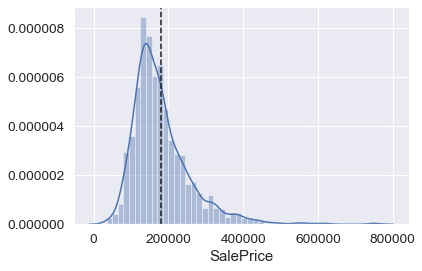

In [42]:
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [43]:
# pandas_profiling.ProfileReport(train)

### Dealing with missing values in obvious features

In [44]:
# Type of alley access to property
# print(train['Alley']).column_name()
# for c in train.columns:
#     print(train[c].value_counts())
#     print("Number of NaNs in the column {} is {}".format(c, train[c].isna().sum()))

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['Alley'].fillna('NA', inplace = True)
train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
train['PoolQC'].fillna('NA', inplace = True)
train['Fence'].fillna('NA', inplace = True)
train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
test['Alley'].fillna('NA', inplace = True)
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

In [45]:
# Let's look a column name, and a number of NaNs
train.isna().sum()
#or 
train.columns[train.isna().any()].tolist()

[]

### Feature engineering part

#### Need to check cardinality in train and test sets and look at the outlies in columns to which it applies

In [46]:
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, train[col].nunique()-test[col].nunique()))

For column MSZoning cardinality in Train minus cardinality in Test equals: 0
For column Street cardinality in Train minus cardinality in Test equals: 0
For column Alley cardinality in Train minus cardinality in Test equals: 0
For column LotShape cardinality in Train minus cardinality in Test equals: 0
For column LandContour cardinality in Train minus cardinality in Test equals: 0
For column Utilities cardinality in Train minus cardinality in Test equals: 1
For column LotConfig cardinality in Train minus cardinality in Test equals: 0
For column LandSlope cardinality in Train minus cardinality in Test equals: 0
For column Neighborhood cardinality in Train minus cardinality in Test equals: 0
For column Condition1 cardinality in Train minus cardinality in Test equals: 0
For column Condition2 cardinality in Train minus cardinality in Test equals: 3
For column BldgType cardinality in Train minus cardinality in Test equals: 0
For column HouseStyle cardinality in Train minus cardinality in Tes

#### Exploring columns where cardinality in train and test sets isn't the same

In [47]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [ ]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        
# cols_list1 = [cols_list1.append(train.col) for col in train.columns 
#               if (train[col].nunique()-test[col].nunique()) != 0]

# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, col='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

In [ ]:
# Scatterplots: numeric columns vs. SalePrice in the train set 
# numeric columns
digit_cols = list(train.select_dtypes(include=[np.number]).columns.values)
digit_cols = digit_cols[2:] # don't need the first two columns
# scatter plots: digit_cols vs. SalePrice

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'SalePrice', data = train)
    
# LotFrontage, YearBuilt, TotalBsmtSF, 1stFlrSF, GarageArea seem to have linear relationships

In [50]:
# list w/ categorical variables
cater_cols = list(train.select_dtypes(exclude=[np.number]).columns.values)

In [ ]:
# categorical variables vs. SalePrice
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [52]:
train['MSSubClass'] = train['MSSubClass'].astype('category') # so that numbers in this column are treated as category

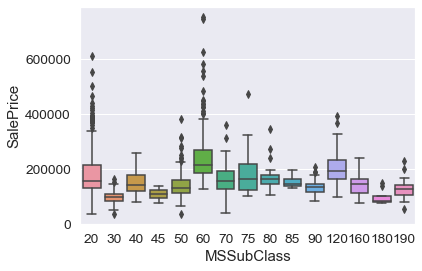

In [53]:
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train)
# outliers: 60 2-STORY 1946 & NEWER; 20 1-STORY 1946 & NEWER ALL STYLES

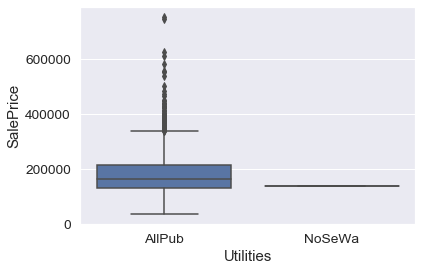

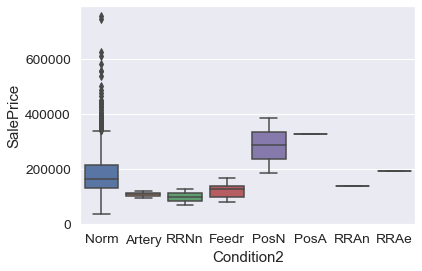

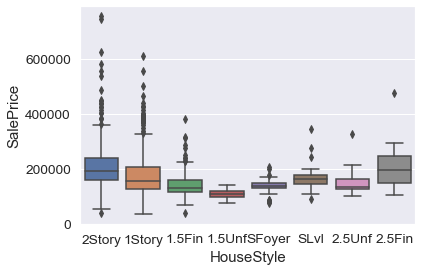

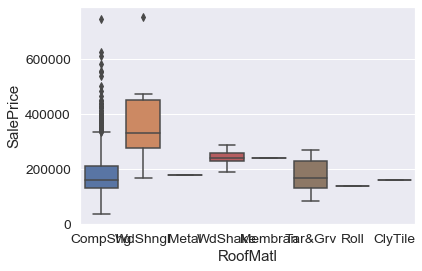

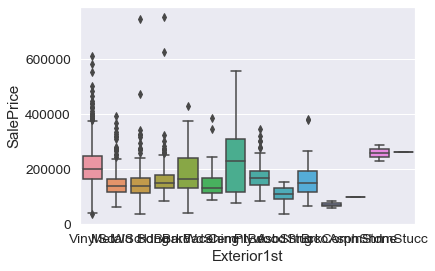

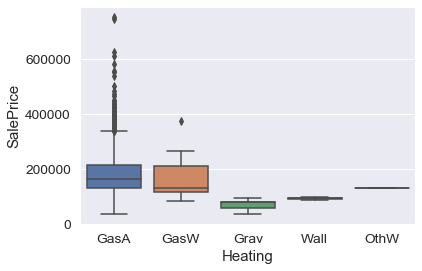

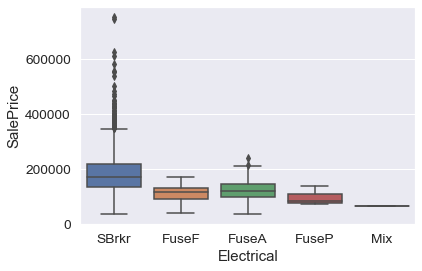

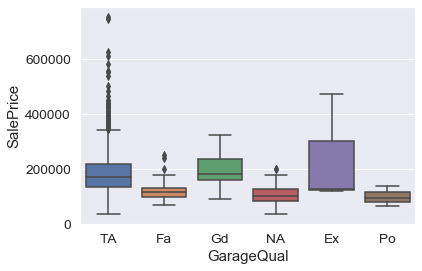

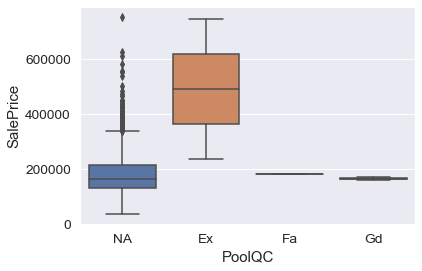

In [54]:
# Going back to columns with different cardinality cols_list
for cols in cols_list:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [55]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

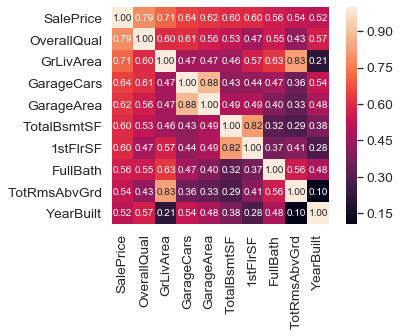

In [56]:
corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# GrLivArea: Above grade (ground) living area square feet -- the strongest
#GarageCars and GarageArea is probably the same. Keeping only GarageCars because it's stronger
#TotalBsmtSF and 1stFlrSF are similar, keeping only TotalBsmntSF

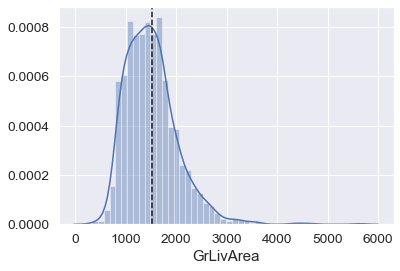

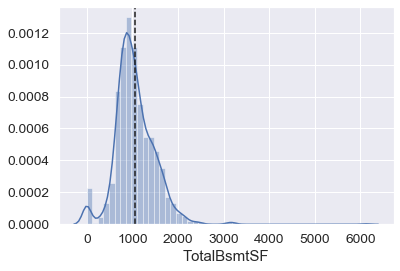

In [57]:
# Looking at these variables again
sns.distplot(train['GrLivArea'])
plt.axvline(train['GrLivArea'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['TotalBsmtSF'])
plt.axvline(train['TotalBsmtSF'].mean(), color="k", linestyle="--")

#will need log transformation probably or some other normalization

In [58]:
plt.clf()
plt.close()

In [59]:
# Engineering around the house age
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# Will add a new column: Remodeled Y/N. If YearRemodAdd = YearBuilt, then no, otherwise yes 
# Will add a new column: Age when sold. YrSold - YearRemodAdd 
combo['Remodeled Y/N'] = np.where(combo['YearRemodAdd'] ==combo['YearBuilt'], 'No', 'Yes')
combo['Age when Sold'] = combo['YrSold'] - combo['YearRemodAdd']

In [60]:
#and for the train set
train['Remodeled Y/N'] = np.where(train['YearRemodAdd'] ==train['YearBuilt'], 'No', 'Yes')
train['Age when Sold'] = train['YrSold'] - train['YearRemodAdd']

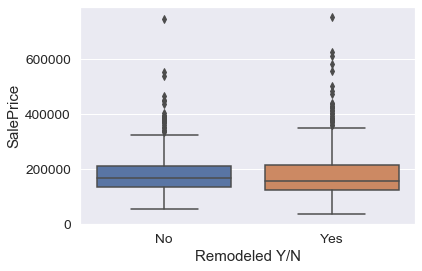

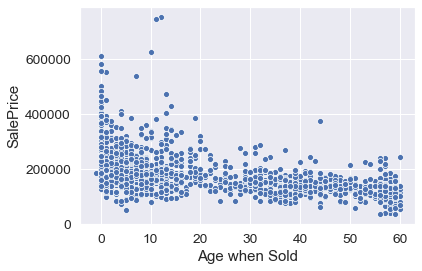

In [61]:
sns.boxplot(x ='Remodeled Y/N' , y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'Age when Sold', y = 'SalePrice', data = train)
# nothing crazy

In [62]:
#adding a new column totSqFt
#TotalBsmtSF + GrLivArea
train['totSqFt'] = train['TotalBsmtSF'] + train['GrLivArea']
combo['totSqFt'] = combo['TotalBsmtSF'] + combo['GrLivArea']

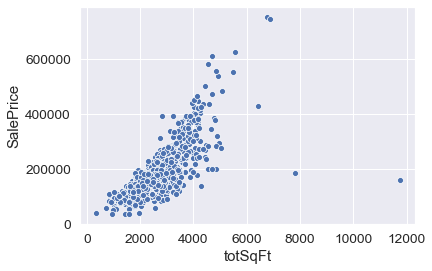

In [63]:
sns.scatterplot(x = 'totSqFt', y = 'SalePrice', data = train)
# a bit better than when they're one by one as below

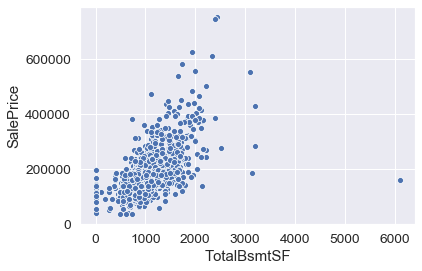

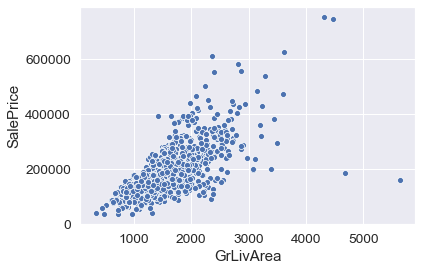

In [64]:
# one by one
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train)

In [65]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

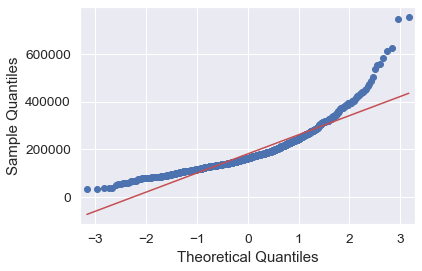

In [66]:
qqplot(train['SalePrice'], line='s')
pyplot.show()
# might be good to remove houses > 600K. Maybe do it later

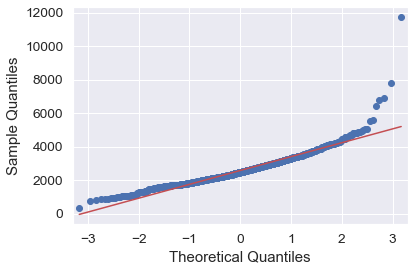

In [67]:
qqplot(train['totSqFt'], line='s')
pyplot.show()

In [68]:
# Remove correlated variables
# Remove houses that are very cheap and very expensive

In [69]:
# checking outliers
# train[train['totSqFt']>10000]
# train[train['SalePrice']>700000]
# Seems that removing a house with totSqFt > 10000 is a good idea
train.drop(train[train.totSqFt>10000].index, inplace = True)

In [70]:
# correlated variables to remove: GarageArea, 1stFlrSF, totRmsAbvGrd
train_clean = train.copy()
train_clean.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'], axis = 1, inplace = True) 
# now it's a new train dataset without the correlated features

(array([ 42., 293., 442., 253., 131.,  65.,  30.,  22.,  10.,   3.,   3.,
          1.,   2.,   0.,   2.]),
 array([ 34900.        ,  82906.66666667, 130913.33333333, 178920.        ,
        226926.66666667, 274933.33333333, 322940.        , 370946.66666667,
        418953.33333333, 466960.        , 514966.66666667, 562973.33333333,
        610980.        , 658986.66666667, 706993.33333333, 755000.        ]),
 <a list of 15 Patch objects>)

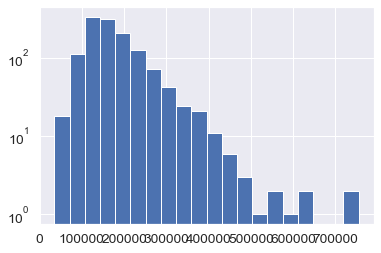

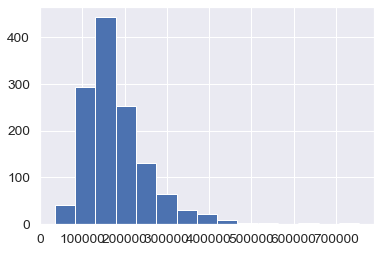

In [71]:
# train['SalePrice'].describe()
plt.hist(train['SalePrice'],bins = 20, log=True) 
plt.figure()
plt.hist(train['SalePrice'], bins = 15) 

### Encoding categorical features using dummy variables

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [77]:
features = train.drop(['Id','SalePrice'], axis = 1)
result = train['SalePrice']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 12)

In [84]:
le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')

In [108]:
ohe.fit(X_train.select_dtypes(include=['object']))  

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [109]:
X_train_ohe = ohe.transform(X_train.select_dtypes(include=['object']))
X_test_ohe = ohe.transform(X_test.select_dtypes(include=['object']))

# Machine Learning part

### Base case with a random forest

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier()
rf.fit(X_train_ohe, y_train)

C:\Users\us61565\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
#Making prediction on unseen data
predictions_rf = rf.predict(X_test_ohe)

In [115]:
accuracy_score(y_test, predictions_rf)

0.007692307692307693

### Regression and lasso

In [117]:
# Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [118]:
lr.fit(X_train_ohe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
predictions_lr = lr.predict(X_test_ohe)

In [126]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [131]:
print("Explained variance is {}\nR-squared is {}".format(explained_variance_score(y_test, predictions_lr),
     r2_score(y_test, predictions_lr)))


Explained variance is 0.7741690432201886
R-squared is 0.7738760881771418


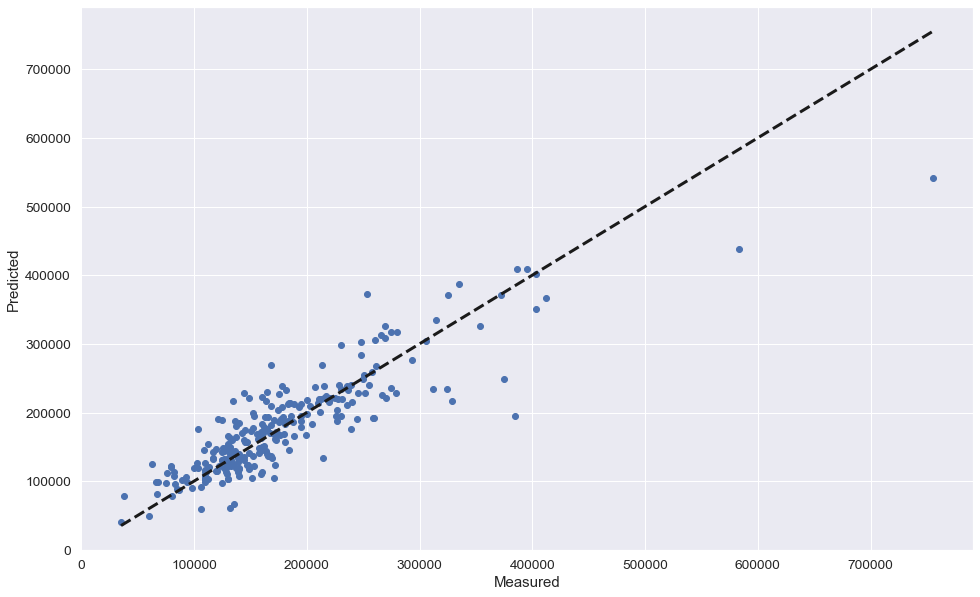

In [139]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_test, predictions_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# cross-validation
# lasso and another cross-validation. GridSearch for lasso and another cross-validation

In [146]:
from sklearn.model_selection import cross_validate

In [163]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='r2', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

0.6979380419642421


In [164]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='explained_variance', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

0.7028435096446614


In [165]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='max_error', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

-267676.28842702386
